<a href="https://colab.research.google.com/github/abhilash1910/EuroPython-21-QuantumDeepLearning/blob/master/Quantum_Gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quantum Gates

In this notebook, we will be using [Xanadu Pennylane](https://pennylane.ai/) for creating a simple quantum circuit using a single qubit. We will also be optimizing the circuit and determine the final residual states in which the qubit will be existing after ```n``` epochs.
First we will be installing the required libraries , pennylane and qiskit(for plotting Bloch sphere).

### Quantum Circuit

Here we are going to create the single qubit circuit on which we will be applying rotation gates along with y and x axis and compute the final residual state using Pauliz gate.

<img src="https://pennylane.ai/qml/_images/rotation_circuit.png">

 we first start with a qubit in the ground state 
|
0
⟩
=
[
1
0
]
T
, and rotate it around the x-axis by applying the gate

Rx(ϕ1)=exp(−iϕ1σx/2)
,
and then around the y-axis via the gate

Ry(ϕ2)=exp(−iϕ2σy/2)

After these operations the qubit is now in the state

|
ψ
⟩
=
R
y
(
ϕ
2
)
R
x
(
ϕ
1
)
|
0
⟩
.
Finally, we measure the expectation value 
⟨
ψ
∣
σ
z
∣
ψ
⟩
 of the Pauli-Z operator

σ
z
=
[
1
0
0
−
1
]
.



Using the above to calculate the exact expectation value, we find that

⟨
ψ
∣
σ
z
∣
ψ
⟩
=
⟨
0
∣
R
x
(
ϕ
1
)
†
R
y
(
ϕ
2
)
†
σ
z
R
y
(
ϕ
2
)
R
x
(
ϕ
1
)
∣
0
⟩
=
cos
(
ϕ
1
)
cos
(
ϕ
2
)
.
Depending on the circuit parameters 
ϕ
1
 and 
ϕ
2
, the output expectation lies between 
1
 (if 
|
ψ
⟩
=
|
0
⟩
) and 
−
1
 (if 
|
ψ
⟩
=
|
1
⟩
).

In the next step we optimize this cost function by adagrad optimizer. The cost function is to restrict the outputs of the qubit in [-1 1]. By minimizing the cost function, the optimizer will determine the values of the circuit parameters that produce the desired outcome.
In this case, our desired outcome is a Pauli-Z expectation value of 
−
1
. Since we know that the Pauli-Z expectation is bound between 
[
−
1
,
1
]
, we can define our cost directly as the output of the QNode.

In [ ]:
!pip install qiskit

In [ ]:
!pip install pennylane


### Methods

The ```create_device``` method is used to create a [Pennylane Quantum Device](https://pennylane.readthedocs.io/en/stable/code/api/pennylane.device.html).We are using the qubit model, so let’s initialize the 'default.qubit' device provided by PennyLane; a simple pure-state qubit simulator. 
The number of wires indicate the number of simulataneous qubits we are incorporating in our device.

The ```create_circuit``` method is used to create the ansatz which we discussed. It uses the [Pennylane Qnode](https://pennylane.readthedocs.io/en/stable/code/api/pennylane.qnode.html) class for creating the gates (Rx,Ry,Rz,Pauli,Hadamard,T,S,Damping gates,Amplitude gates/noisy channels etc)
QNodes are an abstract encapsulation of a quantum function, described by a quantum circuit. QNodes are bound to a particular quantum device, which is used to evaluate expectation and variance values of this circuit.

The ```optimize``` method is used to optimize the cost function by passinga  [Pennylane Optimizer](https://pennylane.readthedocs.io/en/stable/code/api/pennylane.AdagradOptimizer.html). We test for 100 steps so that the cost function converges to produce the final values in the range of [-1 1] as mentioned earlier. Since the Pauliz is bounded in range [-1 1].

Details of this notebook has been abstracted from [Pennylane Guides](https://pennylane.ai/qml/demos/tutorial_qubit_rotation.html)


Substituting this into the theoretical result 
⟨
ψ
∣
σ
z
∣
ψ
⟩
=
cos
ϕ
1
cos
ϕ
2
, we can verify that this is indeed one possible value of the circuit parameters that produces 
⟨
ψ
∣
σ
z
∣
ψ
⟩
=
−
1
, resulting in the qubit being rotated to the state 
|
1
⟩
.

In [4]:
import pennylane as qml
from pennylane import numpy as np

#Create a basic default Quantum circuit

#First , create a device to use the qubits 
def create_device():
  return qml.device("default.qubit",wires=1)
dev=create_device()

#Create an instance of Qnode() class which takes as parameters: the device name  
@qml.qnode(dev)
def create_circuit(inputs):
  qml.RX(inputs[0],wires=0)
  qml.RY(inputs[1],wires=0)
  #qml.CNOT(wires=[0,1])
  return qml.expval(qml.PauliZ(0))#,qml.expval(qml.PauliZ(1))

d_circuit=qml.grad(create_circuit,argnum=0)

#Create a cost function to optimize
def cost_function(x):
  return create_circuit(x)

#Creating an optimizer for gradient descent
def optimize(inputs):
  opt=qml.AdagradOptimizer(stepsize=0.6,eps=1e-8)
  steps=100

  for i in range(steps):
    inputs=opt.step(cost_function,inputs)
    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost_function(inputs)))

  print("Optimized rotation angles: {}".format(inputs))
  return inputs


inp=[0.011,0.012]
print("Cost Function values")
print(create_circuit(inp))
print(cost_function(inp))
print("Computing Adagrad Gradients")
inputs = np.array([0.011, 0.012])
angles=optimize(inputs)



Cost Function values
0.9998675058299389
0.9998675058299389
Computing Adagrad Gradients
Cost after step     5: -0.0000056
Cost after step    10: -0.0071013
Cost after step    15: -0.9002818
Cost after step    20: -0.9999845
Cost after step    25: -1.0000000
Cost after step    30: -1.0000000
Cost after step    35: -1.0000000
Cost after step    40: -1.0000000
Cost after step    45: -1.0000000
Cost after step    50: -1.0000000
Cost after step    55: -1.0000000
Cost after step    60: -1.0000000
Cost after step    65: -1.0000000
Cost after step    70: -1.0000000
Cost after step    75: -1.0000000
Cost after step    80: -1.0000000
Cost after step    85: -1.0000000
Cost after step    90: -1.0000000
Cost after step    95: -1.0000000
Cost after step   100: -1.0000000
Optimized rotation angles: [1.83058964e-34 3.14159265e+00]


## Visualization of Bloch Sphere

Here we are using [Qiskit](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_vector.html) for plotting the final angles of the qubit. The angles are along the three cartesian coordinates.

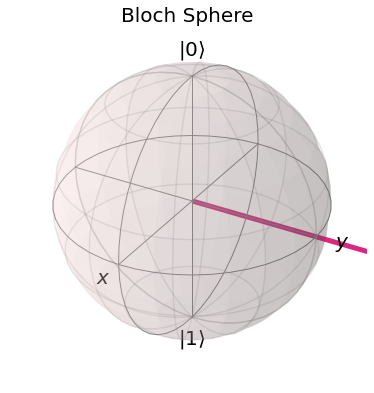

In [5]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline
angles=list(angles.numpy())
rot_x=[angles[0],angles[1],0]

plot_bloch_vector(rot_x, title="Bloch Sphere")

## Additional Samples of Qubit Circuits

Here we will be creating another Quantum 2 bit circuit for gradient optimization based on the previous methodology. Also we will be visualizing the quantum circuit parameters in action. We will be using the [Hadamard](https://pennylane.readthedocs.io/en/stable/code/api/pennylane.Hadamard.html) gate and combine the 2 wire results in a single Pauliz gate. 
The Hadamard operator

H
=
1
√
2
[
1
1
1
−
1
]
.


In [20]:
dev = qml.device('default.qubit.tf', wires=["a","b"])

@qml.qnode(dev)
def dual_circuit(a):
    qml.Hadamard("a")
    qml.RX(a[0], wires=["a"])
    qml.RY(a[1],wires=["b"])
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

def cost_fun(x):
  return dual_circuit(x)

def plotter(circuit):
  return qml.draw(circuit)
print("Input states to the Circuit")
inputs=[0.011,0.012]
print("Results after convergence")
results=optimize(inputs)
print("Drawing the circuit")
drawer=plotter(dual_circuit)
print(drawer(inputs))




Input states to the Circuit
Results after convergence
Cost after step     5: -0.0000056
Cost after step    10: -0.0071013
Cost after step    15: -0.9002818
Cost after step    20: -0.9999845
Cost after step    25: -1.0000000
Cost after step    30: -1.0000000
Cost after step    35: -1.0000000
Cost after step    40: -1.0000000
Cost after step    45: -1.0000000
Cost after step    50: -1.0000000
Cost after step    55: -1.0000000
Cost after step    60: -1.0000000
Cost after step    65: -1.0000000
Cost after step    70: -1.0000000
Cost after step    75: -1.0000000
Cost after step    80: -1.0000000
Cost after step    85: -1.0000000
Cost after step    90: -1.0000000
Cost after step    95: -1.0000000
Cost after step   100: -1.0000000
Optimized rotation angles: [1.8305896426782133e-34, 3.141592653589793]
Drawing the circuit
 a: ──H──────────RX(0.011)───┤         
 b: ──RY(0.012)──────────────┤         
 0: ────────────────────────╭┤ ⟨Z ⊗ Z⟩ 
 1: ────────────────────────╰┤ ⟨Z ⊗ Z⟩ 

